<a href="https://colab.research.google.com/github/HromovAndrey/II_mood_4_part_2/blob/main/%D0%A3%D1%80%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

In [21]:

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv",
                 usecols=['carat', 'depth', 'price']
                 )

df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


In [22]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.FloatTensor(X.values).to(device)
    self.y = torch.FloatTensor(y.values).to(device)
    self.y = self.y.reshape(-1, 1)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

X = df.drop(columns=['price'])
y = df['price']

dataset = MyDataset(X, y)

In [23]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=True,
                        generator=torch.Generator(device=device))

In [24]:
X_batch, y_batch = next(iter(dataloader))

In [25]:
X_batch.shape

torch.Size([128, 2])

In [26]:
y_batch.shape

torch.Size([128, 1])

In [27]:
X_batch.device

device(type='cuda', index=0)

In [28]:
from torch import nn

model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1)
)
model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [29]:
from torchsummary import summary

summary(model, input_size=(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 4]              12
              ReLU-2                    [-1, 4]               0
            Linear-3                    [-1, 1]               5
Total params: 17
Trainable params: 17
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [30]:
#Функція втрат середньоквакдратичної помилки
loss_fn = nn.MSELoss()

#Оптимізація для оновлення ваг моделі
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


In [31]:
import numpy as np

num_epochs = 10
losses = []

for epoch in range(num_epochs):
  losses_ = []
  for X_batch, y_batch in dataloader:
    y_pred = model(X_batch)
    loss = loss_fn(y_pred, y_batch)
    losses_.append(loss.item())

    #зворотнє поширення
    loss.backward()# рахуємо градієнти
    optimizer.step()
    optimizer.zero_grad()

  losses.append(np.mean(losses_))
  if epoch %1 == 0:
    print(f'loss={losses[-1]}')

loss=23387250.72393365
loss=17286801.170616113
loss=16173748.08056872
loss=15958158.787914691
loss=15918104.422985783
loss=15919046.392180094
loss=15907277.642180094
loss=15909724.881516587
loss=15905257.31042654
loss=15915180.42535545


(0.0, 25000000.0)

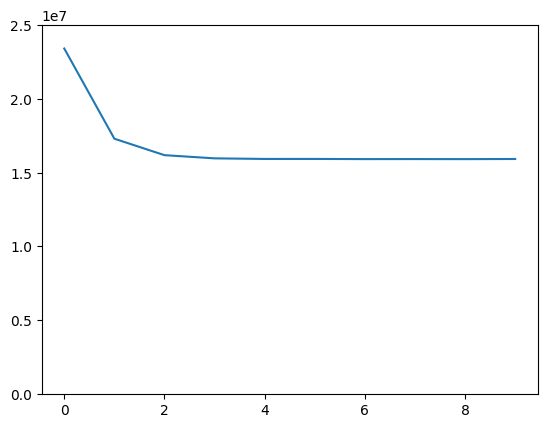

In [32]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylim(0, 0.25*1e8)

In [33]:
torch.save(model, 'model.pt')

In [34]:
load_model = torch.load('model.pt')

In [35]:
load_model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [36]:
X_data = torch.FloatTensor(X.loc[[0]].values)
X_data = X_data.to(device)

print(X_data)
print(X_data.shape)

tensor([[ 0.2300, 61.5000]], device='cuda:0')
torch.Size([1, 2])


In [37]:
load_model(X_data) #порахує градієнти

tensor([[3926.6387]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [38]:
with torch.no_grad():
  print(load_model(X_data))

tensor([[3926.6387]], device='cuda:0')
